BASELINE MODEL WITH SVM

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [7]:

df = pd.read_pickle("../../data/processed/balanced_df.pkl")

X = df['text'].astype(str)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2,
    random_state=42,
    stratify=df['label']   
)

print(f"Train Size: {len(X_train)}, Test Size: {len(X_test)}")

Train Size: 136184, Test Size: 34046


In [ ]:
# pipeline = Pipeline([
#     ('tfidf',TfidfVectorizer()),
#     ('clf',LinearSVC())
# ])

In [ ]:
# param_grid = {
#     'tfidf__ngram_range': [(1,1),(1,2)],
#     'tfidf__min_df': [1,3],
#     'tfidf__max_df':[0.9],
#     'tfidf__sublinear_tf':[True],
#     'tfidf__max_features': [5000],
#     'clf__C': [0.1,  1],
#     'clf__class_weight': [None, 'balanced']
# }

In [ ]:
# grid = GridSearchCV(
#     pipeline,
#     param_grid,
#     cv=3,
#     scoring='f1_macro',
#     verbose=3,
#     n_jobs=1
# )

# grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END clf__C=0.1, clf__class_weight=None, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__sublinear_tf=True;, score=0.584 total time=   9.8s
[CV 2/3] END clf__C=0.1, clf__class_weight=None, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__sublinear_tf=True;, score=0.579 total time=  10.5s
[CV 3/3] END clf__C=0.1, clf__class_weight=None, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__sublinear_tf=True;, score=0.582 total time=   9.2s
[CV 1/3] END clf__C=0.1, clf__class_weight=None, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__sublinear_tf=True;, score=0.584 total time=  27.8s
[CV 2/3] END clf__C=0.1, clf__class_weight=None, tfidf__max_df=0.9, tfidf__max_features=5000, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__sublinear_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', LinearSVC())]),
             n_jobs=1,
             param_grid={'clf__C': [0.1, 1],
                         'clf__class_weight': [None, 'balanced'],
                         'tfidf__max_df': [0.9], 'tfidf__max_features': [5000],
                         'tfidf__min_df': [1, 3],
                         'tfidf__ngram_range': [(1, 1), (1, 2)],
                         'tfidf__sublinear_tf': [True]},
             scoring='f1_macro', verbose=3)

In [14]:
# Drop NaNs in train/test
X_train = X_train.dropna()
y_train = y_train[X_train.index]

X_test = X_test.dropna()
y_test = y_test[X_test.index]


In [ ]:
# # Only if you want to remove literal "nan" strings too
# mask = X_train != 'nan'
# X_train = X_train[mask]
# y_train = y_train[mask]

In [15]:
tfidf = TfidfVectorizer(
    stop_words="english",
    max_features=5000,
    max_df=0.9,
    ngram_range=(1,2),
    sublinear_tf=True
)

X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

print(f'Train TF-IDF shape: {X_train_vec.shape}')

Train TF-IDF shape: (29306, 5000)


In [16]:
svm_clf = LinearSVC(
    C = 1,
    class_weight='balanced',
    max_iter=5000
)

svm_clf.fit(X_train_vec,y_train)

LinearSVC(C=1, class_weight='balanced', max_iter=5000)

              precision    recall  f1-score   support

        FAKE     0.5419    0.9994    0.7027     17023
        REAL     0.9962    0.1550    0.2683     17023

    accuracy                         0.5772     34046
   macro avg     0.7690    0.5772    0.4855     34046
weighted avg     0.7690    0.5772    0.4855     34046



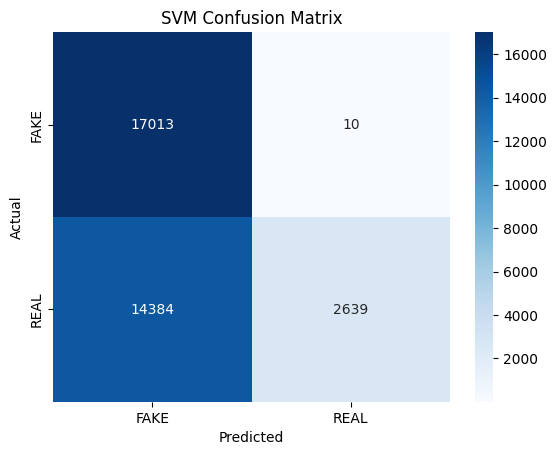

In [18]:
y_pred = svm_clf.predict(X_test_vec)

print(classification_report(y_test,y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',
            xticklabels=svm_clf.classes_,yticklabels=svm_clf.classes_)
plt.title("SVM Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()